In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import copy
import time
import pickle as pkl
import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
#from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml

In [3]:
predictions_dict = {}

In [4]:
output_folder = '../../misc/reports/{}'.format(datetime.datetime.now().strftime("%Y_%m%d_%H%M%S"))

In [5]:
config_filenames = ['uncer.yaml','default.yaml']
model_names = ['MCMC','HyperOpt']

In [6]:
configs = [read_config(cnf) for cnf in config_filenames]

In [7]:
dates = []
for i in range(1):
    dateT = datetime.datetime.now() - datetime.timedelta(days = 70)
    dates.append(dateT)
dates = [dates[-1]]
dates

[datetime.datetime(2020, 8, 30, 8, 59, 28, 367177)]

Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 131795.57           | 132885.14           | 134228.0            | 135362.0            | 136353.0   

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 9/1000 [00:00<00:11, 86.32it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.001633517769319,
    'I_hosp_ratio': 0.9998007770009203,
    'P_fatal': 1.0020613277463186,
    'T_inc': 1.0086044124706388,
    'T_inf': 1.0049695505562746,
    'T_recov': 1.0077761446419917,
    'T_recov_fatal': 1.0021461516196644,
    'lockdown_R0': 1.0056509861869294,
    'sigma': 1.0386564410528383}


100%|██████████| 1000/1000 [00:08<00:00, 113.55it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.0494594496421552), ('T_inc', 4.55057224224233), ('T_inf', 4.217141732683915), ('T_recov', 17.336841500419887), ('T_recov_fatal', 24.51202228498377), ('P_fatal', 0.05724681886790691), ('E_hosp_ratio', 0.19899682273989322), ('I_hosp_ratio', 0.18604067374927566), ('sigma', 1.4476720948722606)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1000 [00:00<00:10, 96.06it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0034465468062197,
    'I_hosp_ratio': 1.000666189969404,
    'P_fatal': 1.0005557628662283,
    'T_inc': 1.0017900961502069,
    'T_inf': 1.0165562644919288,
    'T_recov': 1.0266822504184598,
    'T_recov_fatal': 1.0042289971218954,
    'lockdown_R0': 1.0078675937211192,
    'sigma': 1.997131867941256}


100%|██████████| 1000/1000 [00:08<00:00, 113.27it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.9821680680305476), ('T_inc', 4.780827522364943), ('T_inf', 4.085706227858661), ('T_recov', 17.359381889542128), ('T_recov_fatal', 28.894508617617856), ('P_fatal', 0.06019901522820803), ('E_hosp_ratio', 0.1872544536442587), ('I_hosp_ratio', 0.20630685427689893), ('sigma', 1.586509915838058)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1000 [00:00<00:10, 96.70it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0017609101445548,
    'I_hosp_ratio': 1.0031746135602595,
    'P_fatal': 1.0215656848962424,
    'T_inc': 1.0028032554814637,
    'T_inf': 1.006383945887245,
    'T_recov': 1.0028975168660483,
    'T_recov_fatal': 1.000278714241295,
    'lockdown_R0': 1.0087285754471802,
    'sigma': 1.1022706970530496}


100%|██████████| 1000/1000 [00:08<00:00, 113.83it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.9497327527801005), ('T_inc', 4.368498833895702), ('T_inf', 3.518731897359426), ('T_recov', 17.969020743279234), ('T_recov_fatal', 14.521044713881658), ('P_fatal', 0.03622550810114711), ('E_hosp_ratio', 0.1911286871495152), ('I_hosp_ratio', 0.16255850875493252), ('sigma', 1.4848768631672338)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1000 [00:00<00:10, 94.96it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.018937954093469,
    'I_hosp_ratio': 1.0047462121710555,
    'P_fatal': 1.0299764671448612,
    'T_inc': 1.000148550413408,
    'T_inf': 1.0099266533440032,
    'T_recov': 1.025409638130529,
    'T_recov_fatal': 1.001342836354183,
    'lockdown_R0': 1.027621795225429,
    'sigma': 1.2934915765317774}


100%|██████████| 1000/1000 [00:08<00:00, 113.33it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.0671952417189914), ('T_inc', 4.762879353606651), ('T_inf', 3.055967867317236), ('T_recov', 17.172146959738754), ('T_recov_fatal', 25.05222562921842), ('P_fatal', 0.05123848468121207), ('E_hosp_ratio', 0.1377265205265065), ('I_hosp_ratio', 0.18765538677300828), ('sigma', 2.4684432781020638)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1000 [00:00<00:10, 95.11it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0030756171321866,
    'I_hosp_ratio': 1.0006987496320752,
    'P_fatal': 1.0036311569843275,
    'T_inc': 1.0005419449739164,
    'T_inf': 1.0144703079720225,
    'T_recov': 0.9998318973123422,
    'T_recov_fatal': 1.0159736985275352,
    'lockdown_R0': 1.0028483654893545,
    'sigma': 1.433356321502975}


100%|██████████| 1000/1000 [00:09<00:00, 109.71it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.995315350878999), ('T_inc', 4.211204016746804), ('T_inf', 3.491111836838561), ('T_recov', 17.94455714275735), ('T_recov_fatal', 32.39147363772426), ('P_fatal', 0.06831077127569914), ('E_hosp_ratio', 0.1512243031481012), ('I_hosp_ratio', 0.18605541826607452), ('sigma', 1.686412297845267)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1000 [00:00<00:10, 95.73it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0079650259619122,
    'I_hosp_ratio': 1.0021685961767033,
    'P_fatal': 1.0072926133479176,
    'T_inc': 1.0008377520494043,
    'T_inf': 1.0098600483786535,
    'T_recov': 1.003550500684342,
    'T_recov_fatal': 1.0087886591220974,
    'lockdown_R0': 1.0001215494420426,
    'sigma': 1.2037847684706338}


100%|██████████| 1000/1000 [00:08<00:00, 114.21it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.0964373887265628), ('T_inc', 4.188776682526083), ('T_inf', 4.625515507885043), ('T_recov', 18.88509571196378), ('T_recov_fatal', 22.125887059219856), ('P_fatal', 0.048652734282844536), ('E_hosp_ratio', 0.06735857312392156), ('I_hosp_ratio', 0.2535724963688242), ('sigma', 2.2425132885841372)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 2/1000 [00:00<00:56, 17.64it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 0.999800757317663,
    'I_hosp_ratio': 1.0035897544084882,
    'P_fatal': 1.0381997201371838,
    'T_inc': 1.0002051903295737,
    'T_inf': 1.0002374634059648,
    'T_recov': 1.01382932411607,
    'T_recov_fatal': 1.0136032166722202,
    'lockdown_R0': 1.0048672933810907,
    'sigma': 1.6163256868316442}


100%|██████████| 1000/1000 [00:25<00:00, 38.66it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.9749528970279641), ('T_inc', 3.754198955231349), ('T_inf', 4.715352423219958), ('T_recov', 16.863788799341197), ('T_recov_fatal', 29.402926787573712), ('P_fatal', 0.0693666569674786), ('E_hosp_ratio', 0.19581191923675895), ('I_hosp_ratio', 0.19607992425823634), ('sigma', 2.3181869370215673)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 4/1000 [00:00<00:30, 32.94it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 0.9998107033556225,
    'I_hosp_ratio': 1.0019028432314918,
    'P_fatal': 0.9998968872427724,
    'T_inc': 0.9998114369243909,
    'T_inf': 1.0037542722689248,
    'T_recov': 1.002933185943588,
    'T_recov_fatal': 1.0008228999447417,
    'lockdown_R0': 1.0081960560568926,
    'sigma': 1.1044685256644184}


100%|██████████| 1000/1000 [00:20<00:00, 49.96it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.0511178110325445), ('T_inc', 4.148316514287388), ('T_inf', 3.677512596413571), ('T_recov', 17.054927548217297), ('T_recov_fatal', 35.350151584187486), ('P_fatal', 0.0691746198773342), ('E_hosp_ratio', 0.18883632269364803), ('I_hosp_ratio', 0.15471533333275367), ('sigma', 2.998467045311156)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 4/1000 [00:00<00:29, 33.32it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 0.9998497696404898,
    'I_hosp_ratio': 1.0016311049787046,
    'P_fatal': 1.0062378554302238,
    'T_inc': 0.999812693342811,
    'T_inf': 1.0552932612019137,
    'T_recov': 0.9999816507832204,
    'T_recov_fatal': 1.0063766147327733,
    'lockdown_R0': 1.0000738820636559,
    'sigma': 1.0298081225226796}


100%|██████████| 1000/1000 [00:20<00:00, 48.83it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.13045534117883), ('T_inc', 3.253396717715558), ('T_inf', 3.8975548404348435), ('T_recov', 17.465129685949943), ('T_recov_fatal', 19.14323865568016), ('P_fatal', 0.0567842028324225), ('E_hosp_ratio', 0.07827301181803188), ('I_hosp_ratio', 0.20519701580699892), ('sigma', 1.7014615713370977)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 3/1000 [00:00<00:44, 22.33it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0038754936003464,
    'I_hosp_ratio': 0.9998318282540005,
    'P_fatal': 1.0083954388511367,
    'T_inc': 1.0000744758062927,
    'T_inf': 0.9998524244535691,
    'T_recov': 1.0068905063770002,
    'T_recov_fatal': 1.000796245593692,
    'lockdown_R0': 1.0061997851775892,
    'sigma': 2.075984415862108}


100%|██████████| 1000/1000 [00:23<00:00, 42.04it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.178919426061879), ('T_inc', 3.814029778110857), ('T_inf', 3.190268699853364), ('T_recov', 17.445275568024297), ('T_recov_fatal', 27.36153643382428), ('P_fatal', 0.06245750516133925), ('E_hosp_ratio', 0.06274330542561501), ('I_hosp_ratio', 0.18720054408913672), ('sigma', 2.516636579168369)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 2/1000 [00:00<00:54, 18.45it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0132602707788738,
    'I_hosp_ratio': 1.0060409115387547,
    'P_fatal': 0.9998541035813665,
    'T_inc': 1.0004529967047189,
    'T_inf': 1.0036846598759217,
    'T_recov': 1.003099803683391,
    'T_recov_fatal': 0.9998148094546248,
    'lockdown_R0': 1.0070022500676796,
    'sigma': 2.2377366946320287}


100%|██████████| 1000/1000 [00:27<00:00, 36.10it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.0289203297985905), ('T_inc', 4.675273108213443), ('T_inf', 3.849871867239708), ('T_recov', 17.004578115844996), ('T_recov_fatal', 34.24174016785616), ('P_fatal', 0.07580666245847784), ('E_hosp_ratio', 0.1414922618867201), ('I_hosp_ratio', 0.21562890427752782), ('sigma', 2.054176632818166)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 4/1000 [00:00<00:29, 33.64it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0020093223951083,
    'I_hosp_ratio': 1.0005954821683216,
    'P_fatal': 1.0152066297768607,
    'T_inc': 1.0003214679139019,
    'T_inf': 1.0084082021946381,
    'T_recov': 1.018677410688047,
    'T_recov_fatal': 1.0301365053072653,
    'lockdown_R0': 1.0028843843327515,
    'sigma': 1.0178284835358913}


100%|██████████| 1000/1000 [00:19<00:00, 50.85it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.143247102302104), ('T_inc', 3.554759131679801), ('T_inf', 4.083292846392035), ('T_recov', 18.575877830846544), ('T_recov_fatal', 27.696008899638297), ('P_fatal', 0.061070944947124395), ('E_hosp_ratio', 0.03424389013351372), ('I_hosp_ratio', 0.23357303170086213), ('sigma', 2.4657505679620435)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharash

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 4/1000 [00:00<00:30, 32.89it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0239526443551772,
    'I_hosp_ratio': 1.013869055279968,
    'P_fatal': 1.1224377921409157,
    'T_inc': 1.000509482403118,
    'T_inf': 1.006757562917736,
    'T_recov': 1.0472468441606255,
    'T_recov_fatal': 1.0281098772997226,
    'lockdown_R0': 1.0164728694641532,
    'sigma': 1.7301824084037496}


100%|██████████| 1000/1000 [00:20<00:00, 49.51it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.1800400892948377), ('T_inc', 3.8743255346735084), ('T_inf', 3.2486227195913755), ('T_recov', 18.214349218813254), ('T_recov_fatal', 23.92329161546947), ('P_fatal', 0.051019795037731096), ('E_hosp_ratio', 0.005088496001370235), ('I_hosp_ratio', 0.2370705340892816), ('sigma', 2.1811942347295488)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Mahara

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 4/1000 [00:00<00:28, 34.45it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0165499881054685,
    'I_hosp_ratio': 1.004650145298018,
    'P_fatal': 1.0233478220360455,
    'T_inc': 0.9999234295375122,
    'T_inf': 1.0191315837261292,
    'T_recov': 0.9999706573405799,
    'T_recov_fatal': 1.0029174409658963,
    'lockdown_R0': 1.0029288469490618,
    'sigma': 1.0541249550986196}


100%|██████████| 1000/1000 [00:20<00:00, 48.89it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.118090811135142), ('T_inc', 4.289275693132848), ('T_inf', 3.5809446852039226), ('T_recov', 17.696701049782767), ('T_recov_fatal', 26.79677578345397), ('P_fatal', 0.053367064293007464), ('E_hosp_ratio', 0.08302274444620936), ('I_hosp_ratio', 0.21626248755145144), ('sigma', 2.8827072766009594)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharash

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 4/1000 [00:00<00:30, 32.60it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0013584138676646,
    'I_hosp_ratio': 1.0023990790407014,
    'P_fatal': 1.0166648585663305,
    'T_inc': 1.0016341677638108,
    'T_inf': 0.9998106818814927,
    'T_recov': 1.0061451628839093,
    'T_recov_fatal': 1.0129990083184115,
    'lockdown_R0': 1.0008097685818687,
    'sigma': 1.8561079184735871}


100%|██████████| 1000/1000 [00:20<00:00, 49.58it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.0790394750914338), ('T_inc', 4.745745326270002), ('T_inf', 3.23418498659442), ('T_recov', 17.214062027963212), ('T_recov_fatal', 29.88786744493591), ('P_fatal', 0.06436090363938696), ('E_hosp_ratio', 0.15572714257040918), ('I_hosp_ratio', 0.1699088175349828), ('sigma', 2.0800054625549285)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:50<00:00, 19.73trial/s, best loss: 0.6030260292045216]
best parameters
 {'E_hosp_ratio': 0.2487191106925074, 'I_hosp_ratio': 0.11423385272830905, 'P_fatal': 0.04720312524416644, 'T_inc': 4.1643789432576215, 'T_inf': 3.3700945079837057, 'T_recov': 17.433313404486093, 'T_recov_fatal': 20.202095736891472, 'lockdown_R0': 1.0012714722840905}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:43<00:00, 22.73trial/s, best loss: 0.7775763863133023]
best parameters
 {'E_hosp_ratio': 0.2599744553317399, 'I_hosp_ratio': 0.1617554925582782, 'P_fatal': 0.06336143669529769, 'T_inc': 4.703610273785659, 'T_inf': 3.8484942054915403, 'T_recov': 18.413531034440965, 'T_recov_fatal': 30.067258242087384, 'lockdown_R0': 0.8147099073282242}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [1:48:01<00:00,  6.48s/trial, best loss: 0.5488841260212055]   
best parameters
 {'E_hosp_ratio': 0.17308487799971609, 'I_hosp_ratio': 0.1937239334307202, 'P_fatal': 0.04817453287404999, 'T_inc': 4.185772960958045, 'T_inf': 3.6866539360148645, 'T_recov': 17.315034142604667, 'T_recov_fatal': 22.445484687099917, 'lockdown_R0': 0.9562538367728456}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:0

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [02:05<00:00,  7.95trial/s, best loss: 0.4971931664906214]
best parameters
 {'E_hosp_ratio': 0.19323914485678068, 'I_hosp_ratio': 0.1804901224763161, 'P_fatal': 0.07158752669603248, 'T_inc': 4.118962913913383, 'T_inf': 3.93007473691518, 'T_recov': 17.309719373526292, 'T_recov_fatal': 34.995353998528145, 'lockdown_R0': 0.9603683455309073}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |


/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [01:03<00:00, 15.75trial/s, best loss: 0.6368856506757303]
best parameters
 {'E_hosp_ratio': 0.0975467472699942, 'I_hosp_ratio': 0.24702482438485274, 'P_fatal': 0.06776470029862763, 'T_inc': 4.589170880538267, 'T_inf': 3.98030535097668, 'T_recov': 17.57148212352663, 'T_recov_fatal': 33.81953798186145, 'lockdown_R0': 0.9779028782484704}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 49%|████▉     | 488/1000 [00:20<00:23, 22.15trial/s, best loss: 1.0620455006550953]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1000/1000 [00:48<00:00, 20.43trial/s, best loss: 0.9000726358817601]
best parameters
 {'E_hosp_ratio': 0.4018826119473851, 'I_hosp_ratio': 0.07457378519761262, 'P_fatal': 0.05893939247471183, 'T_inc': 4.5187974703724505, 'T_inf': 3.9551189183586652, 'T_recov': 17.955678022706785, 'T_recov_fatal': 27.669734626119244, 'lockdown_R0': 0.7166757635270773}


../../viz/fit.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=n_rows, figsize=(12, 10*n_rows))


Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 131795.57           | 132885.14           | 134228.0            | 135362.0            | 136353.0   

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:42<00:00, 23.75trial/s, best loss: 0.5836956260270576]
best parameters
 {'E_hosp_ratio': 0.21038844413825442, 'I_hosp_ratio': 0.1368271869038202, 'P_fatal': 0.06651186130793792, 'T_inc': 4.422552238410179, 'T_inf': 3.020830862703417, 'T_recov': 17.930423484283914, 'T_recov_fatal': 31.500925174899002, 'lockdown_R0': 0.9226252447386162}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:41<00:00, 24.11trial/s, best loss: 0.8182115439805122]
best parameters
 {'E_hosp_ratio': 0.3611698076222297, 'I_hosp_ratio': 0.12216661103504665, 'P_fatal': 0.0725885105660367, 'T_inc': 4.869632161787195, 'T_inf': 3.9672998146120912, 'T_recov': 16.7140141512449, 'T_recov_fatal': 38.165193352225344, 'lockdown_R0': 0.7701483329788867}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |
|

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:40<00:00, 24.45trial/s, best loss: 0.47848657706385916]
best parameters
 {'E_hosp_ratio': 0.06499612264512551, 'I_hosp_ratio': 0.20844777110764562, 'P_fatal': 0.08061378933121456, 'T_inc': 4.280497810576687, 'T_inf': 3.2911735540951157, 'T_recov': 16.718313378838833, 'T_recov_fatal': 39.99964149153615, 'lockdown_R0': 1.1298343210076869}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:41<00:00, 24.14trial/s, best loss: 0.6928601914887311]
best parameters
 {'E_hosp_ratio': 0.24863787201343715, 'I_hosp_ratio': 0.17707765564424946, 'P_fatal': 0.06774824899479831, 'T_inc': 4.914847761254646, 'T_inf': 3.980076625316694, 'T_recov': 17.95389332442384, 'T_recov_fatal': 30.656610190560414, 'lockdown_R0': 0.8225559157317771}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:41<00:00, 24.31trial/s, best loss: 0.5941291807612463]
best parameters
 {'E_hosp_ratio': 0.2792842387802486, 'I_hosp_ratio': 0.13329308010009927, 'P_fatal': 0.033560977981475754, 'T_inc': 4.684611296510246, 'T_inf': 3.566221580721269, 'T_recov': 17.9348667173768, 'T_recov_fatal': 12.245771911948042, 'lockdown_R0': 0.9326325777973528}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |


/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 43%|████▎     | 430/1000 [00:16<00:24, 23.60trial/s, best loss: 1.2588419168628775]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 49%|████▉     | 490/1000 [00:19<00:21, 23.95trial/s, best loss: 1.0587489910507464]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 78%|███████▊  | 784/1000 [00:33<00:10, 21.16trial/s, best loss: 1.0587489910507464]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1000/1000 [00:46<00:00, 21.50trial/s, best loss: 0.8325914138435033]
best parameters
 {'E_hosp_ratio': 0.2914732580698843, 'I_hosp_ratio': 0.10770653508268827, 'P_fatal': 0.024217207134088876, 'T_inc': 4.14513208254508, 'T_inf': 3.6418924136044226, 'T_recov': 18.8463313403051, 'T_recov_fatal': 5.9494963574889725, 'lockdown_R0': 0.9121322179171615}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 |


/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:42<00:00, 23.54trial/s, best loss: 0.6842780653108828]
best parameters
 {'E_hosp_ratio': 0.07626157809519679, 'I_hosp_ratio': 0.19744725258293905, 'P_fatal': 0.06152598016046733, 'T_inc': 4.264218668937436, 'T_inf': 3.3474627318408228, 'T_recov': 18.524024118747466, 'T_recov_fatal': 23.98616156662279, 'lockdown_R0': 1.0891020753878493}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1000/1000 [00:42<00:00, 23.51trial/s, best loss: 0.9222187238128475]
best parameters
 {'E_hosp_ratio': 0.25613653755595467, 'I_hosp_ratio': 0.17187472006222224, 'P_fatal': 0.049606634731614495, 'T_inc': 4.150858461583876, 'T_inf': 3.884505919681808, 'T_recov': 16.658036304095145, 'T_recov_fatal': 20.112768446153588, 'lockdown_R0': 0.9472475955563406}
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 115                 | 116                 | 117                 | 118                 | 119                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-19 00:00:00 | 2020-08-20 00:00:00 | 2020-08-21 00:00:00 | 2020-08-22 00:00:00 | 2020-08-23 00:00:00

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 13%|█▎        | 133/1000 [00:04<00:31, 27.74trial/s, best loss: 1.5928761949909434]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1000/1000 [00:43<00:00, 23.13trial/s, best loss: 0.5580475445410574]
best parameters
 {'E_hosp_ratio': 0.15216050315004914, 'I_hosp_ratio': 0.1943059341830021, 'P_fatal': 0.04541112262616904, 'T_inc': 4.82857172463884, 'T_inf': 3.3882432495441837, 'T_recov': 17.446592857529716, 'T_recov_fatal': 16.34595370654384, 'lockdown_R0': 1.0477737014908435}


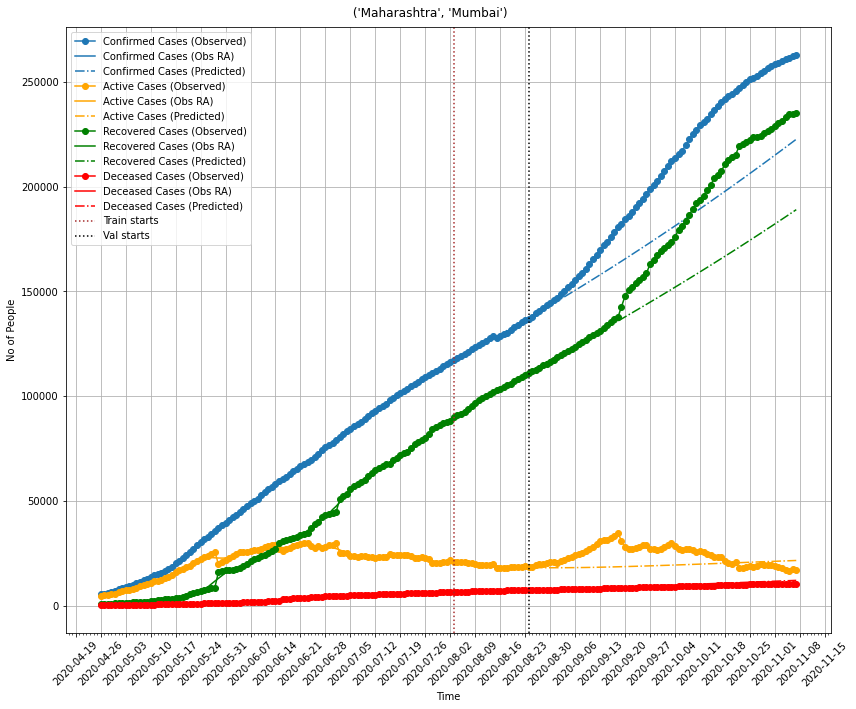

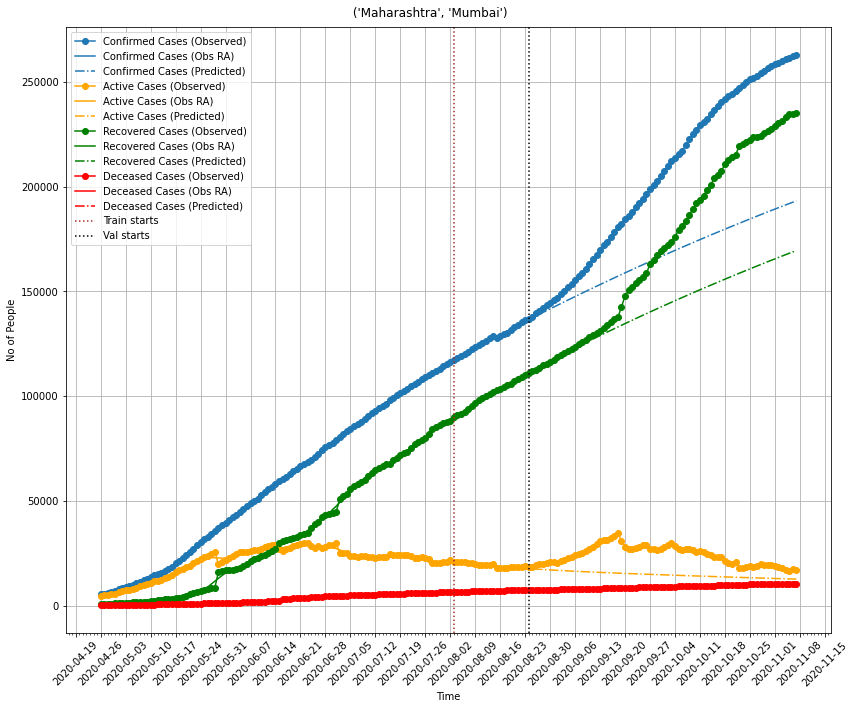

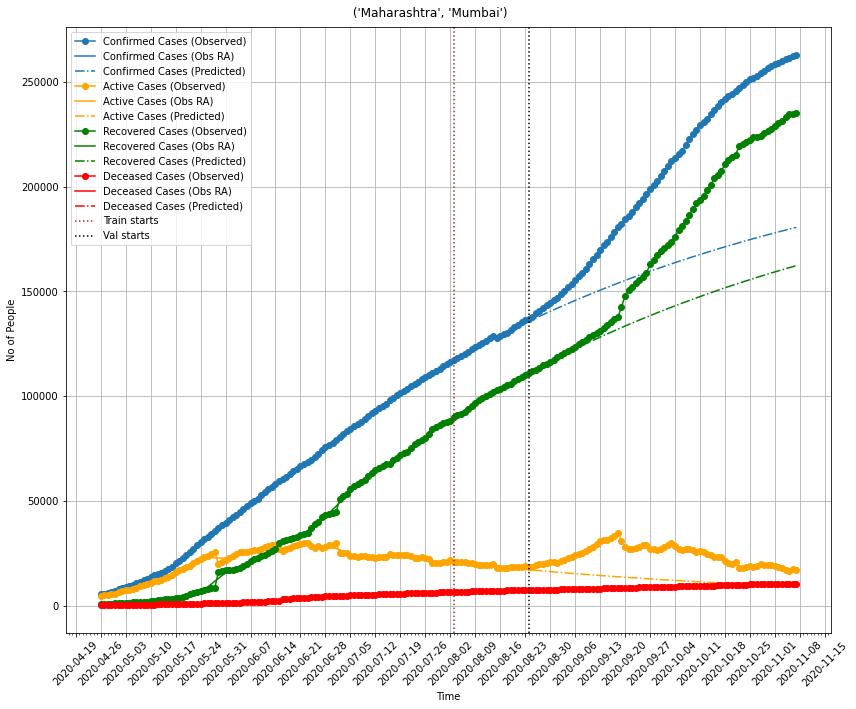

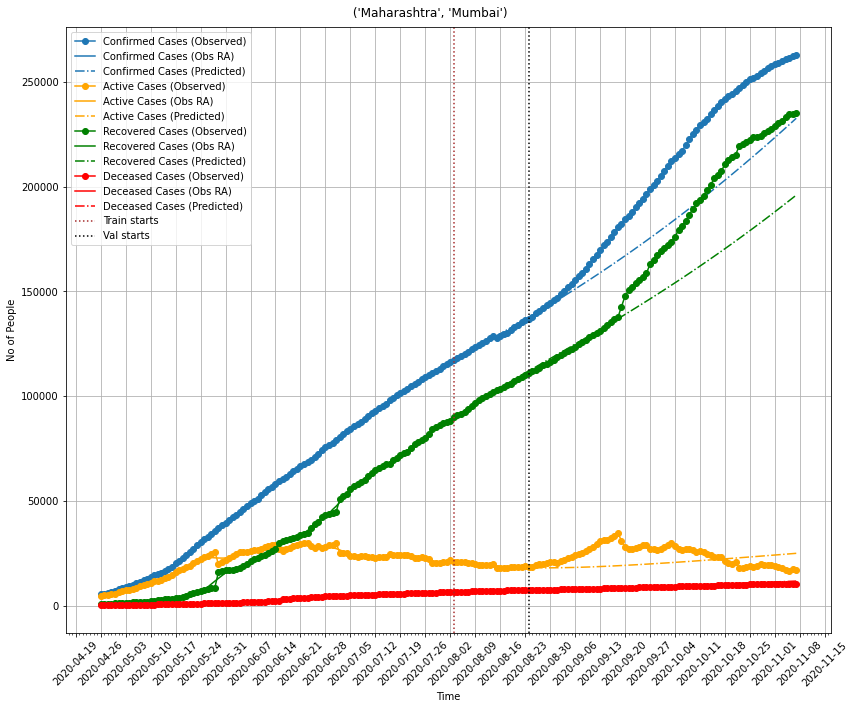

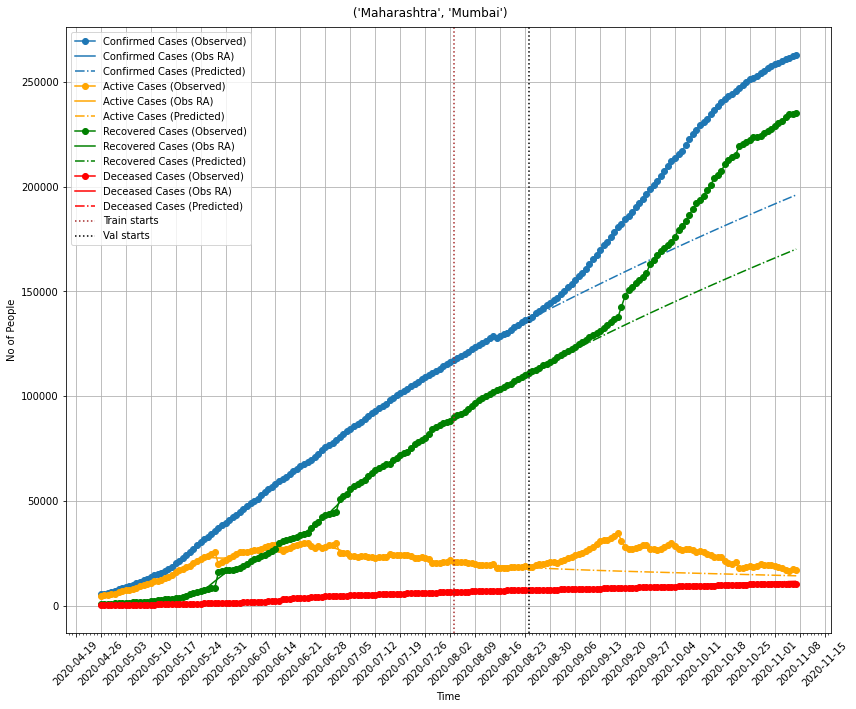

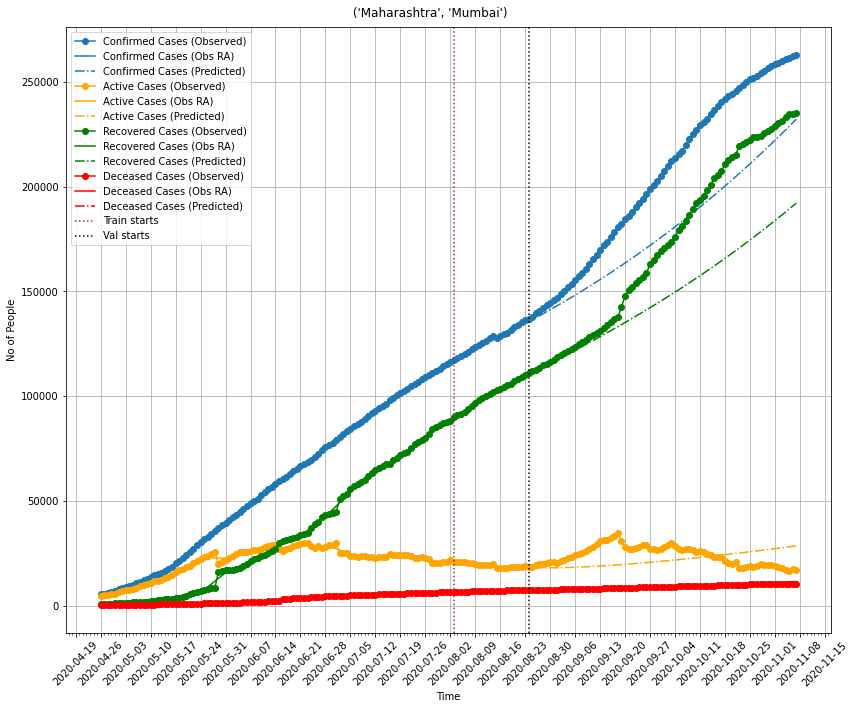

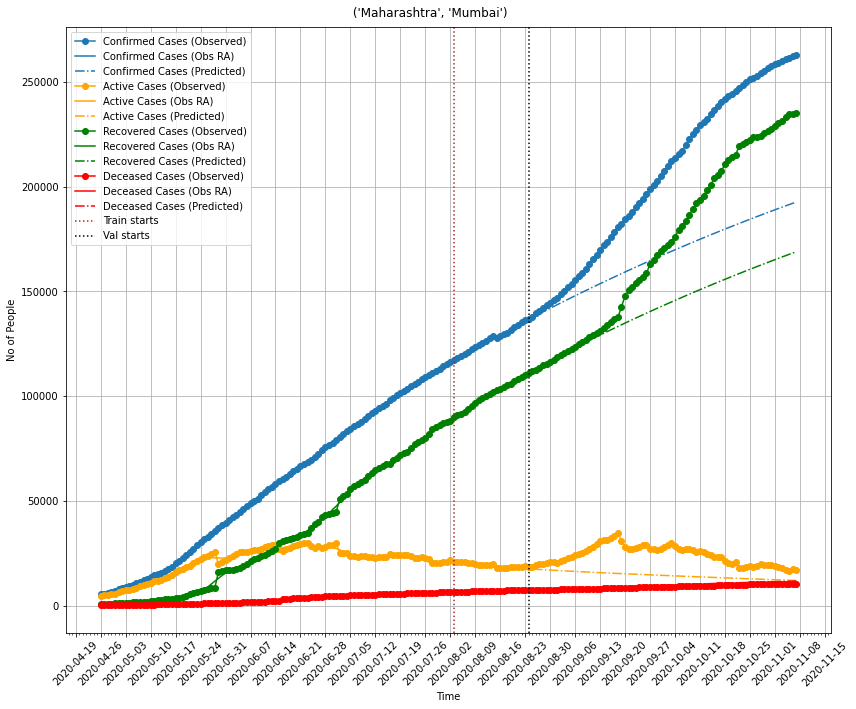

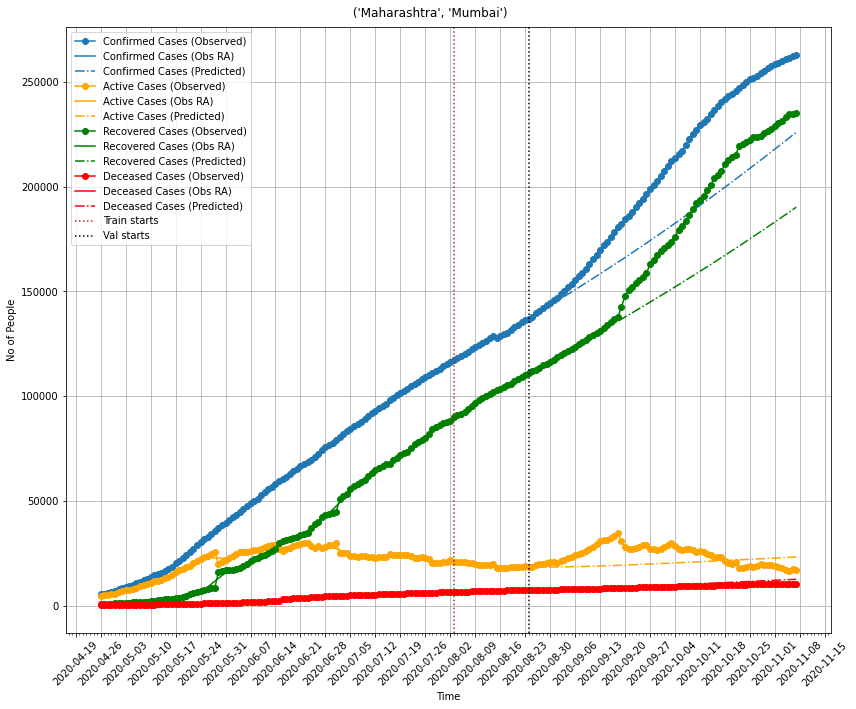

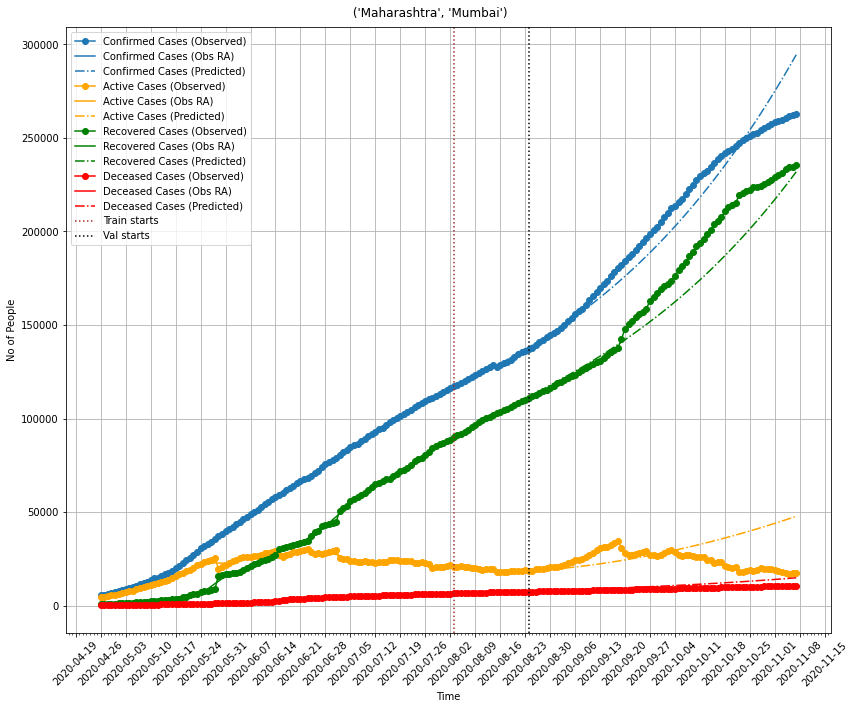

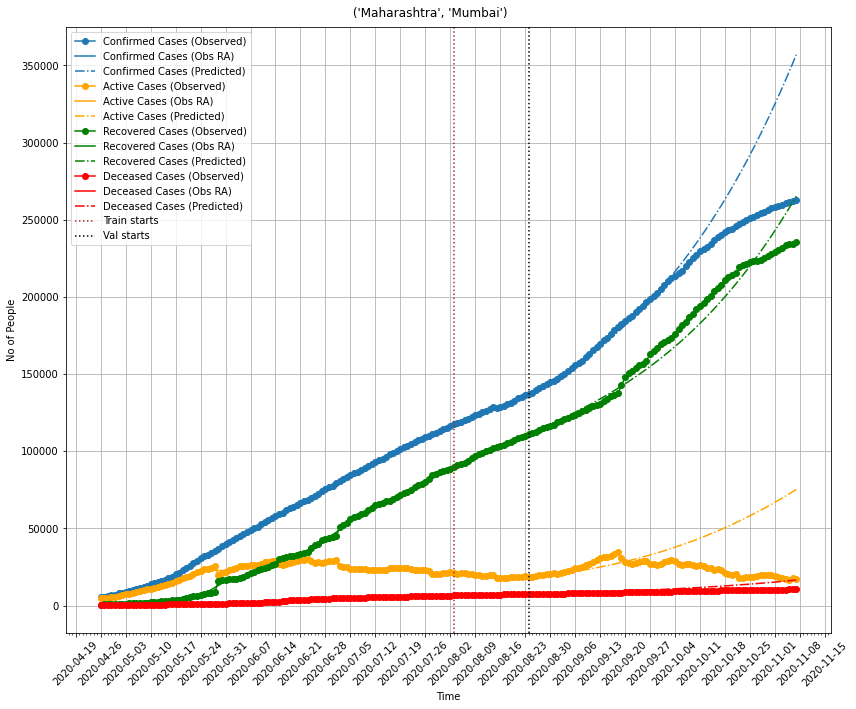

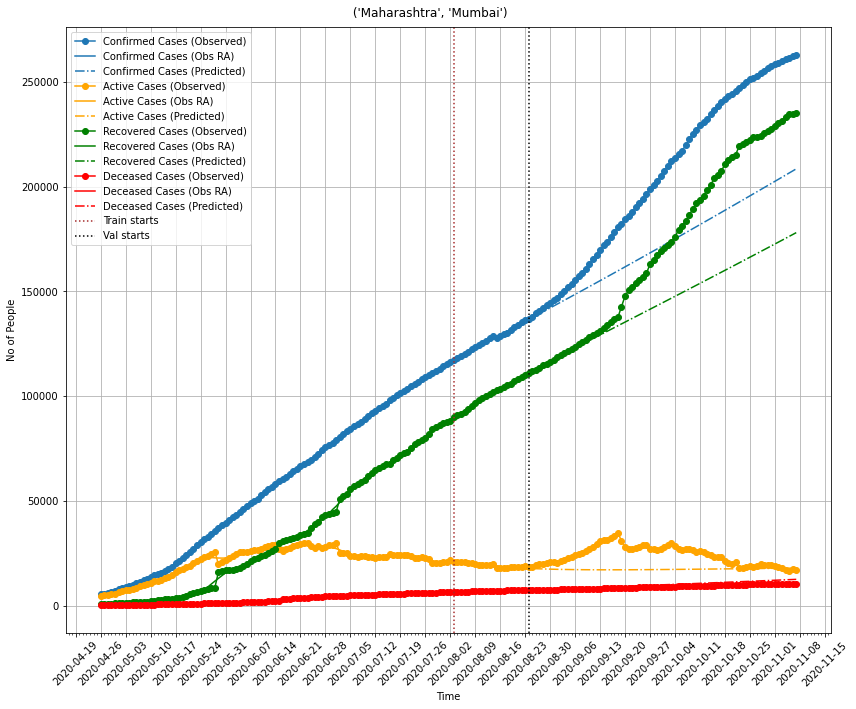

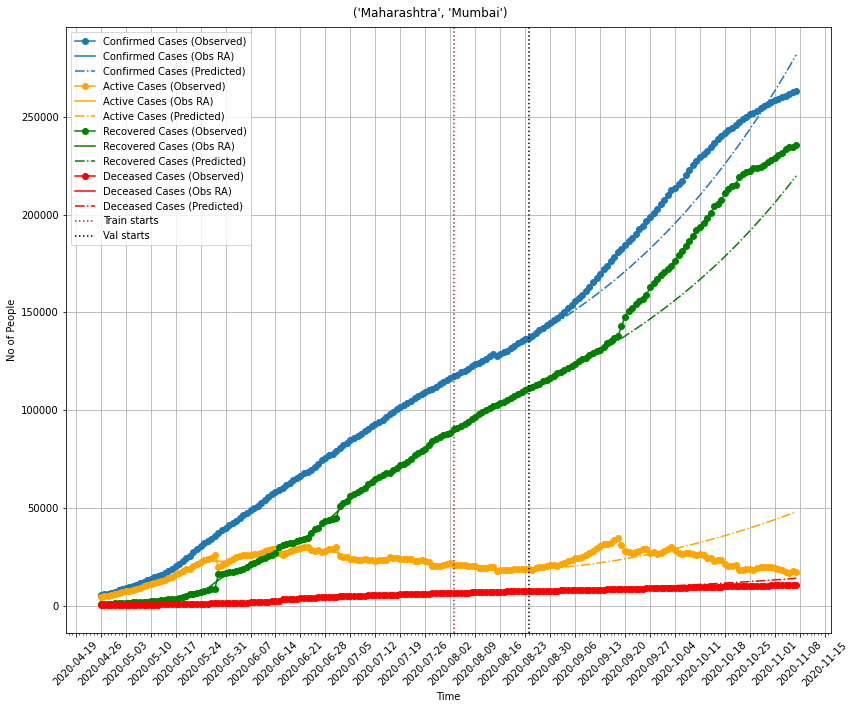

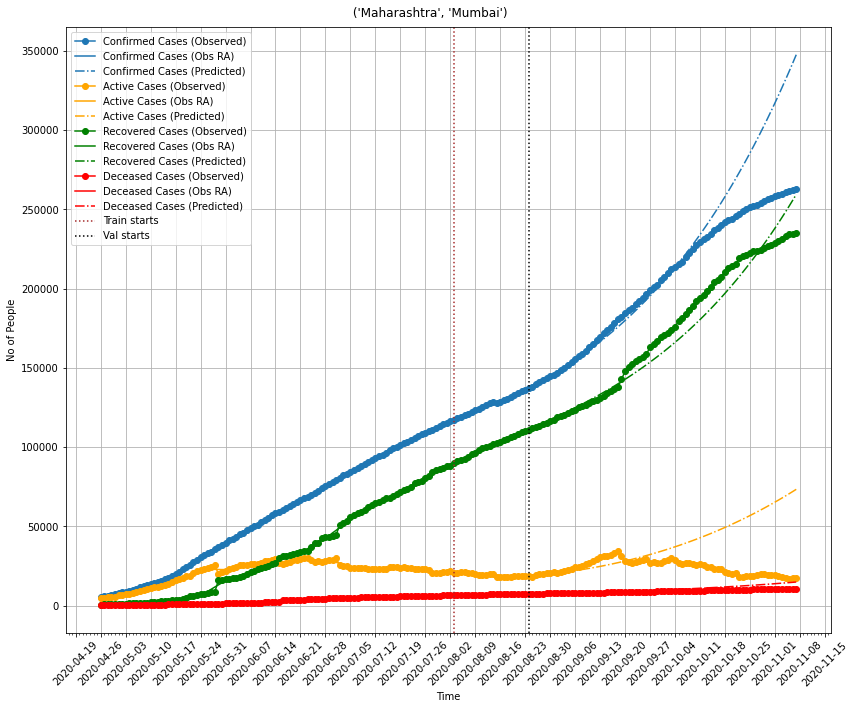

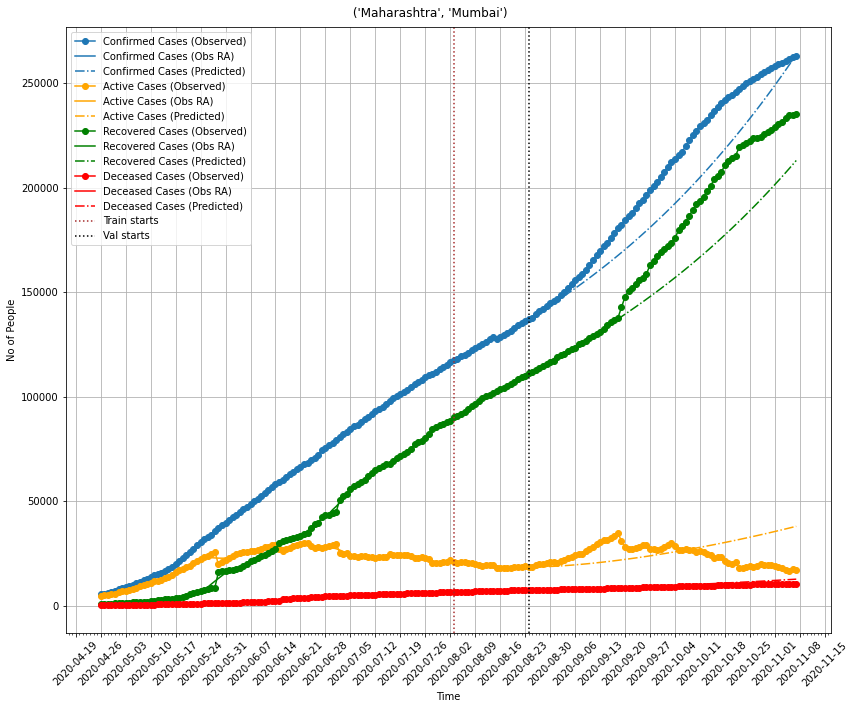

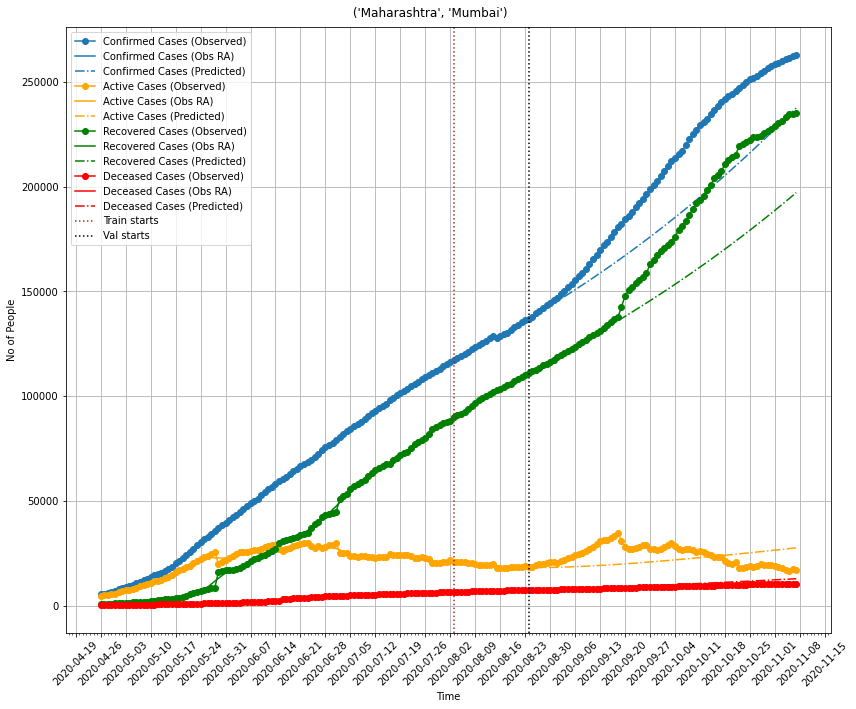

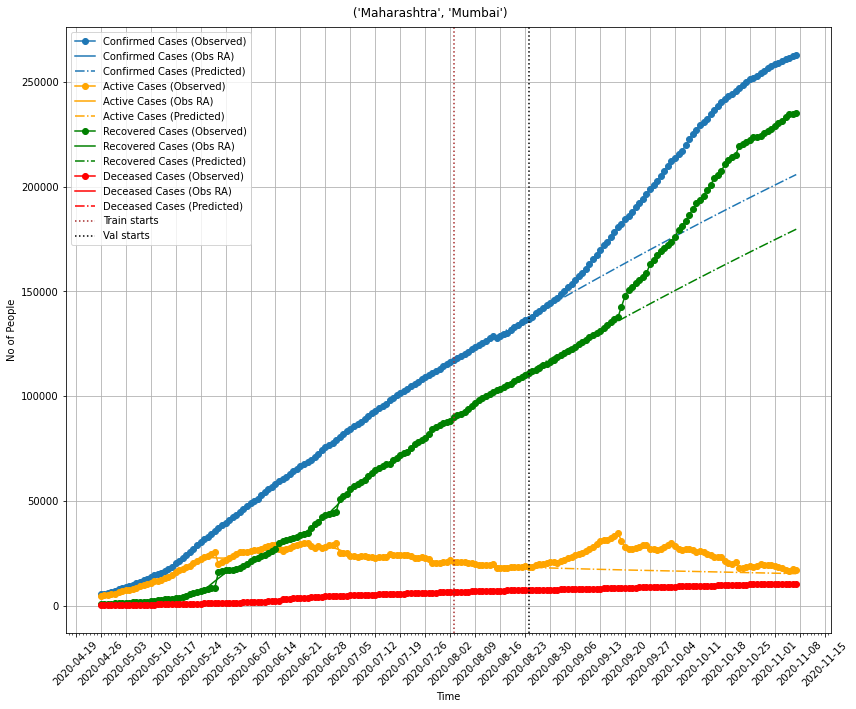

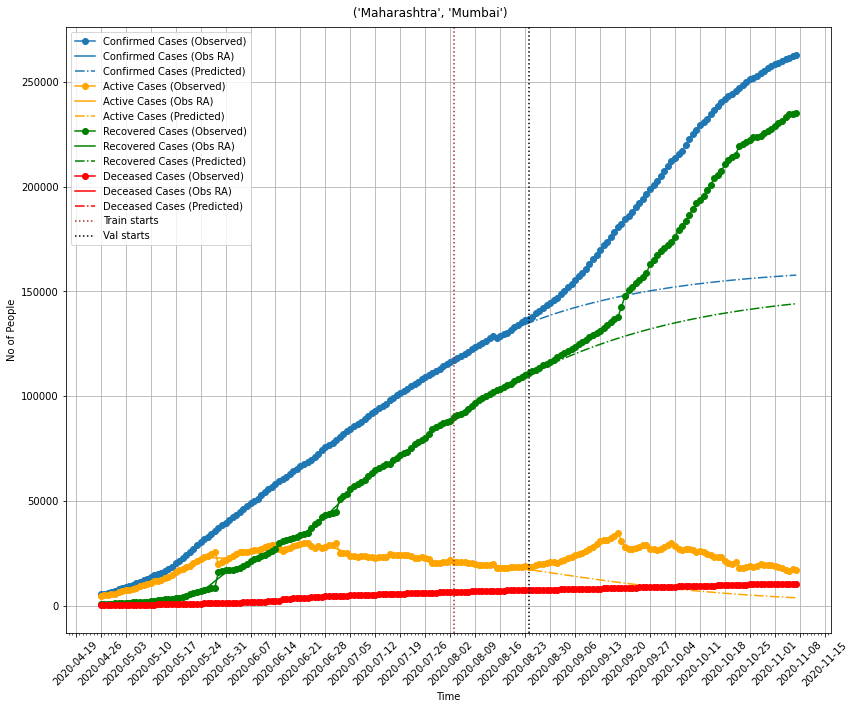

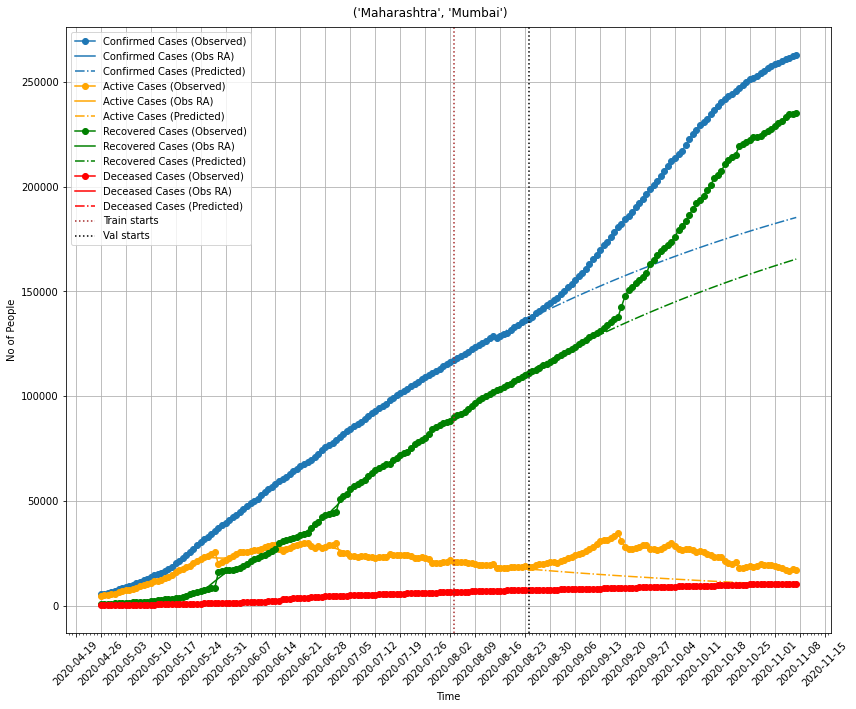

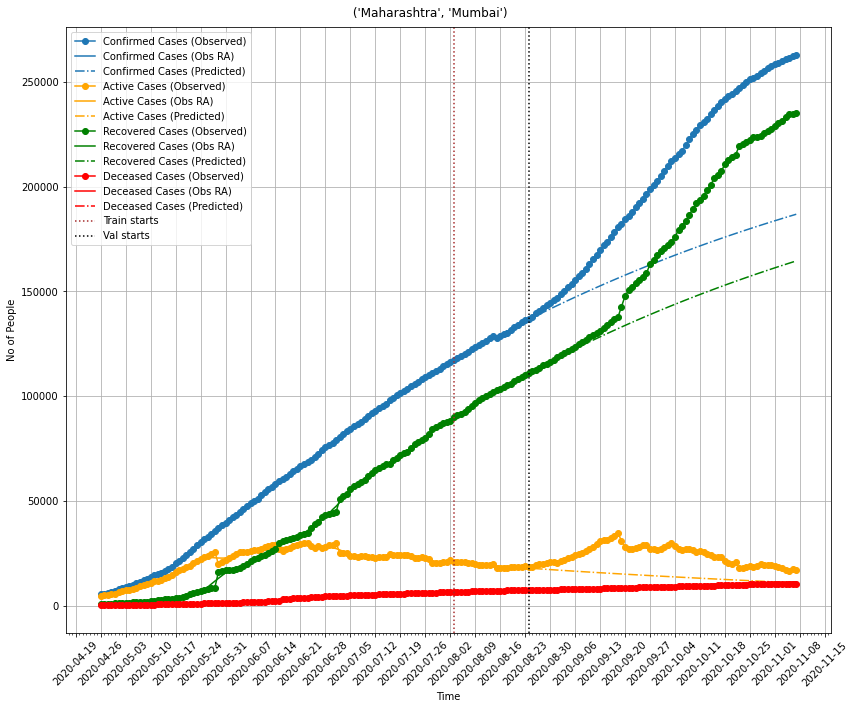

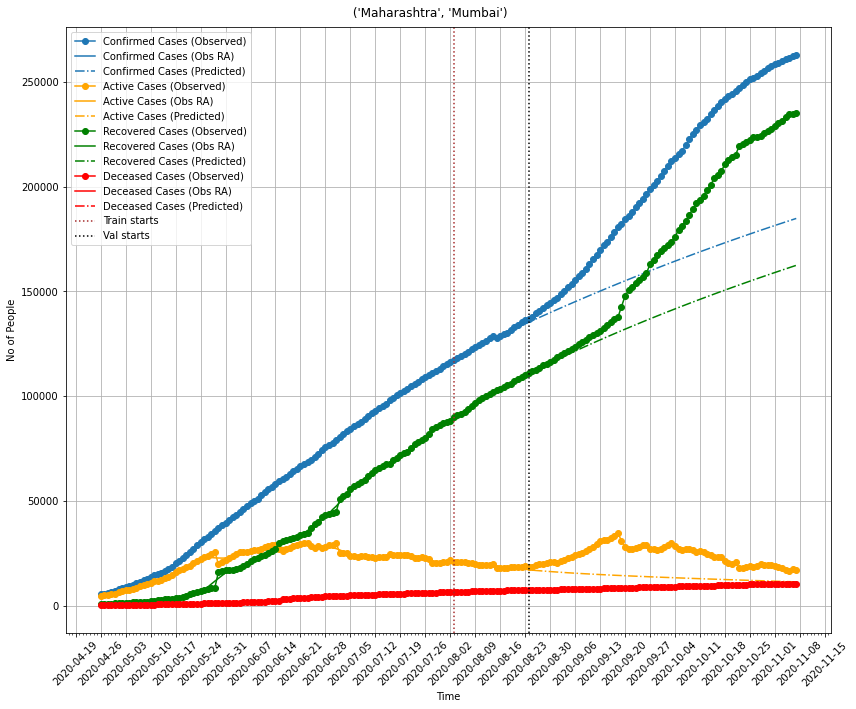

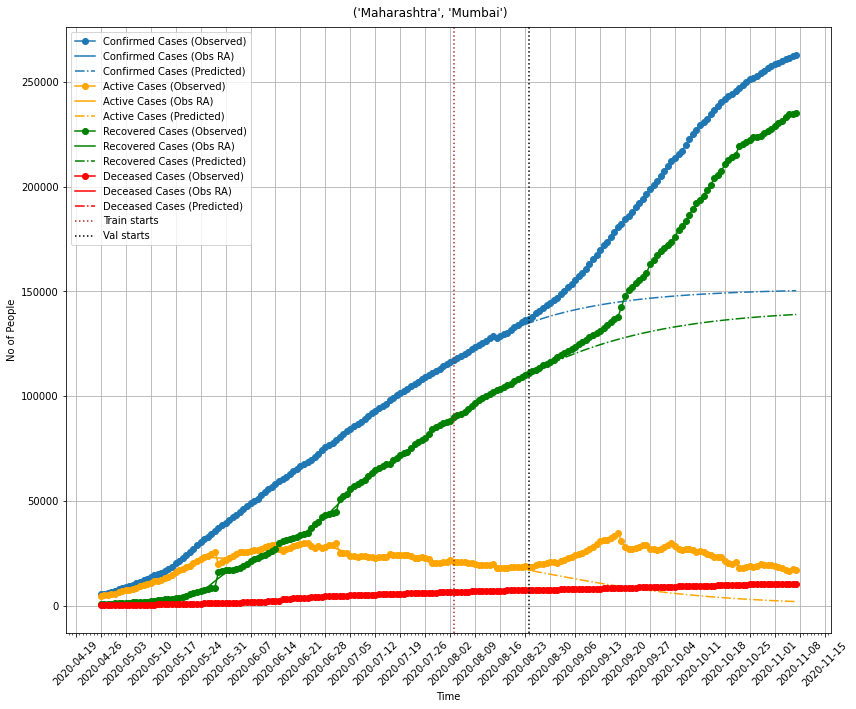

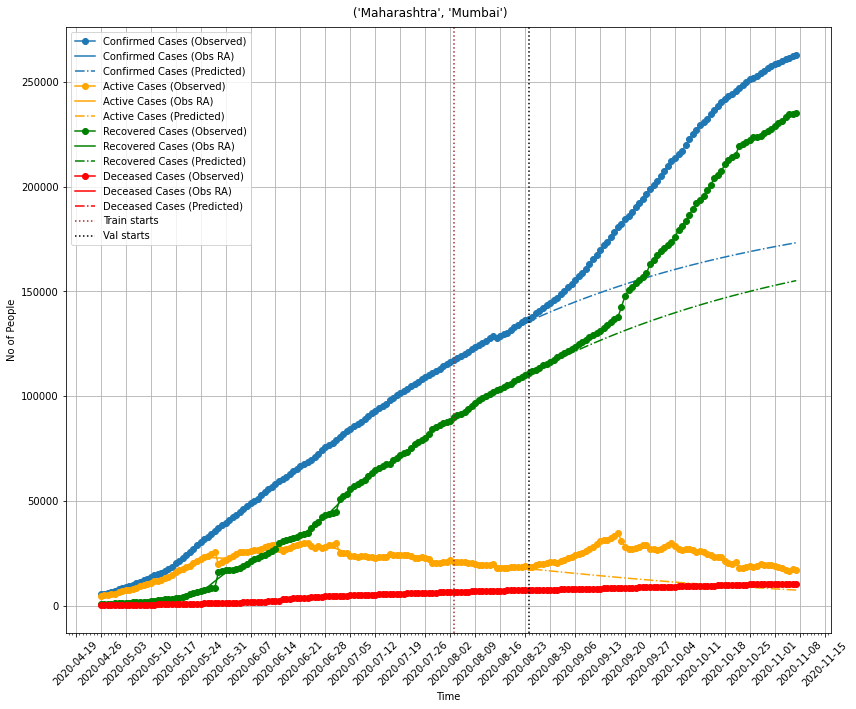

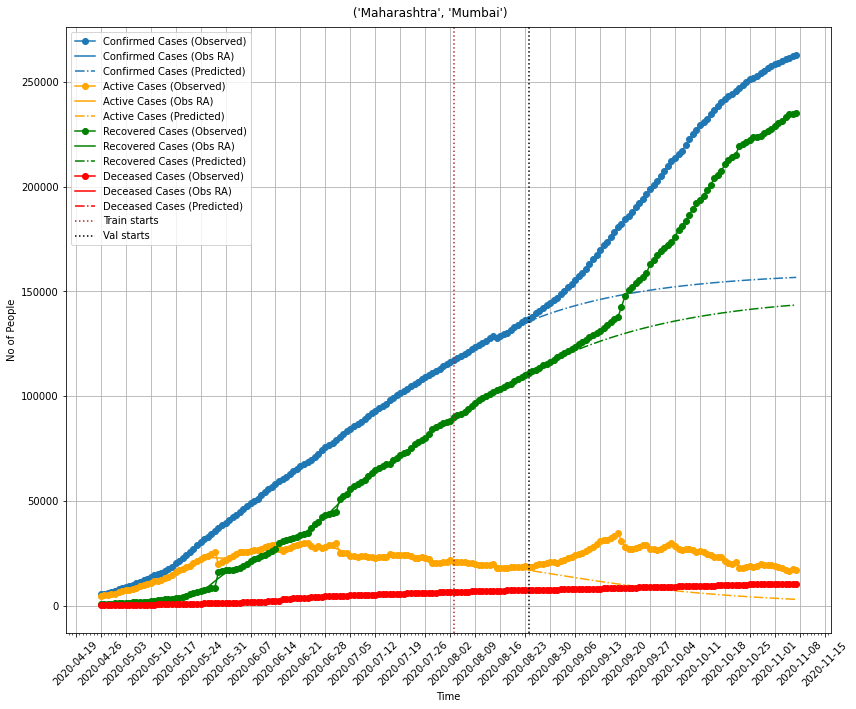

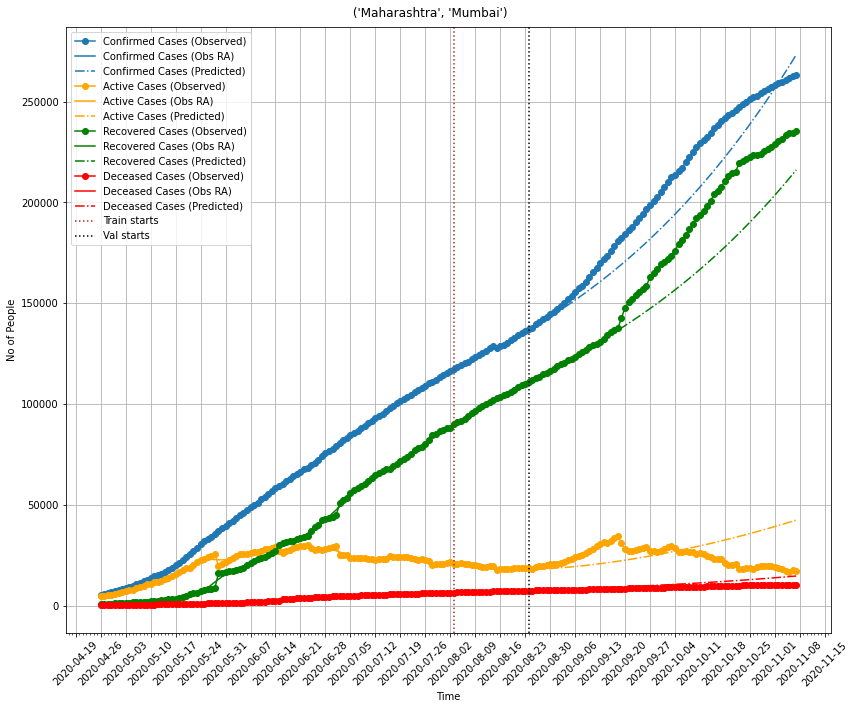

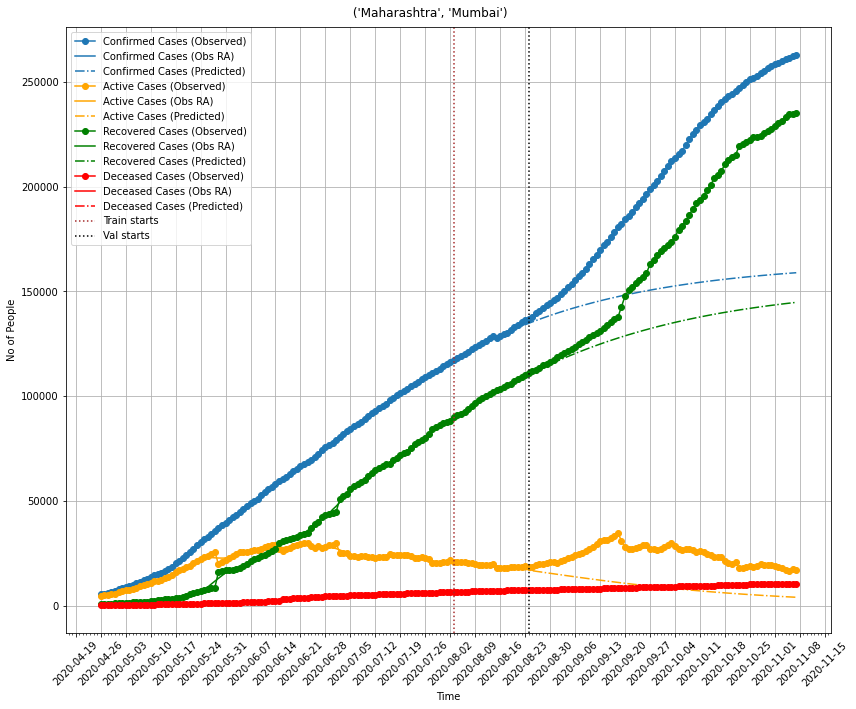

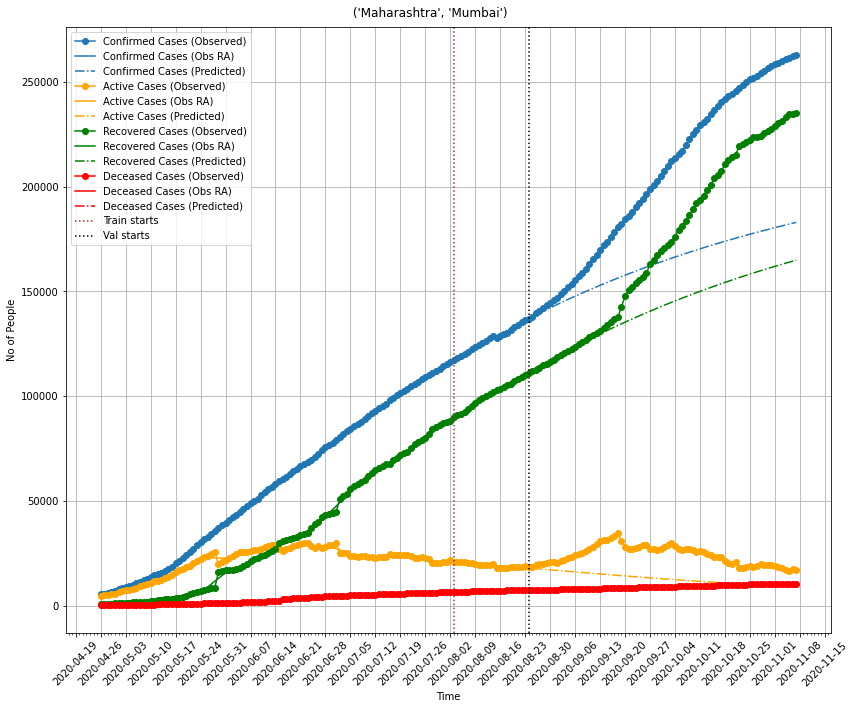

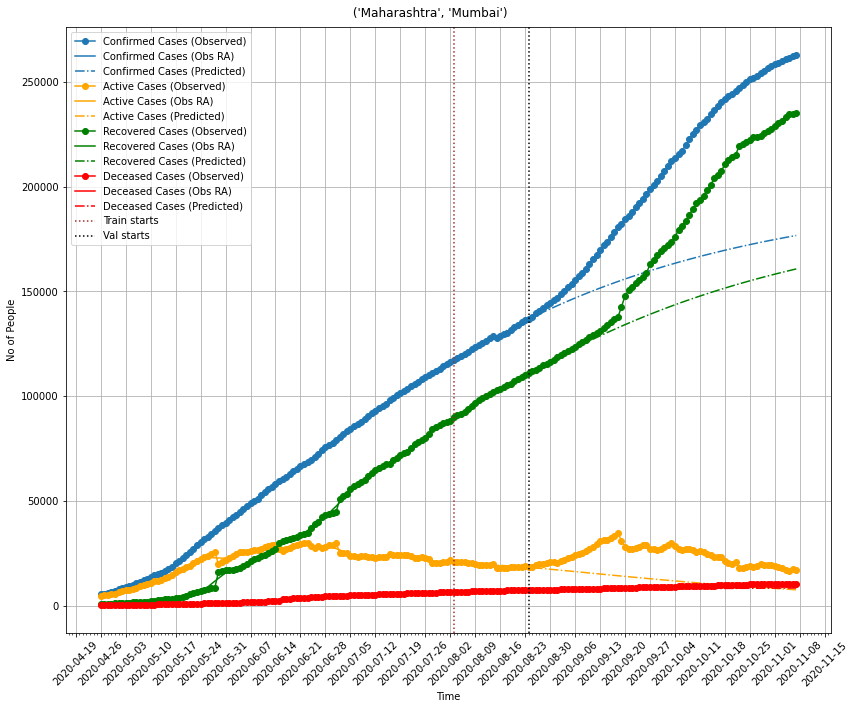

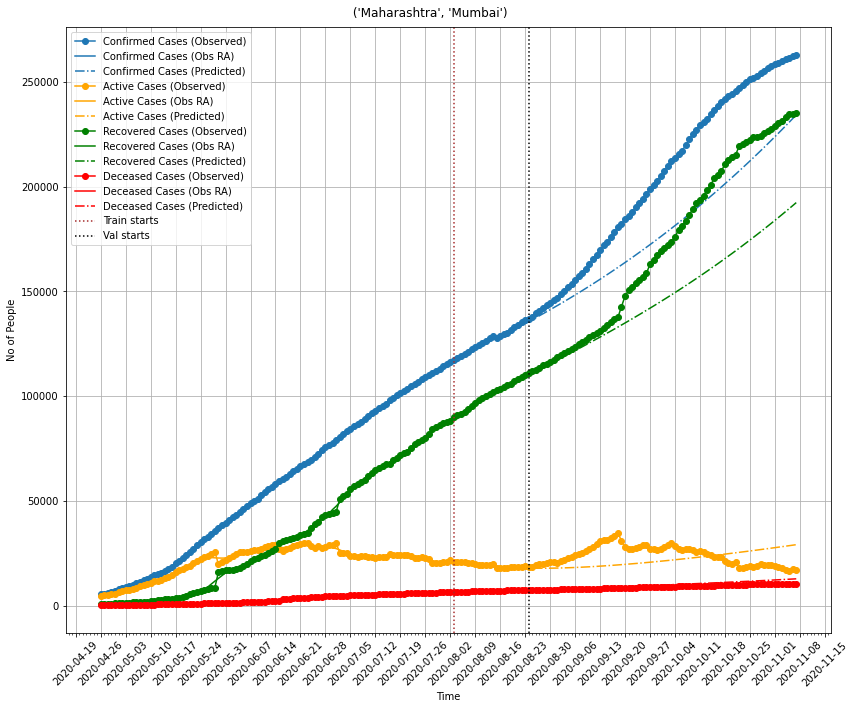

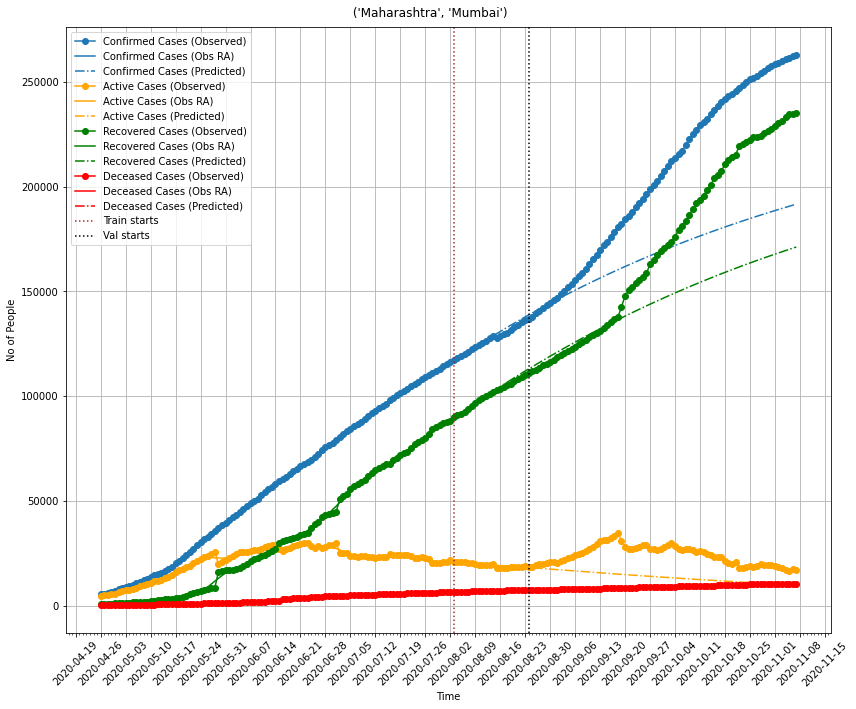

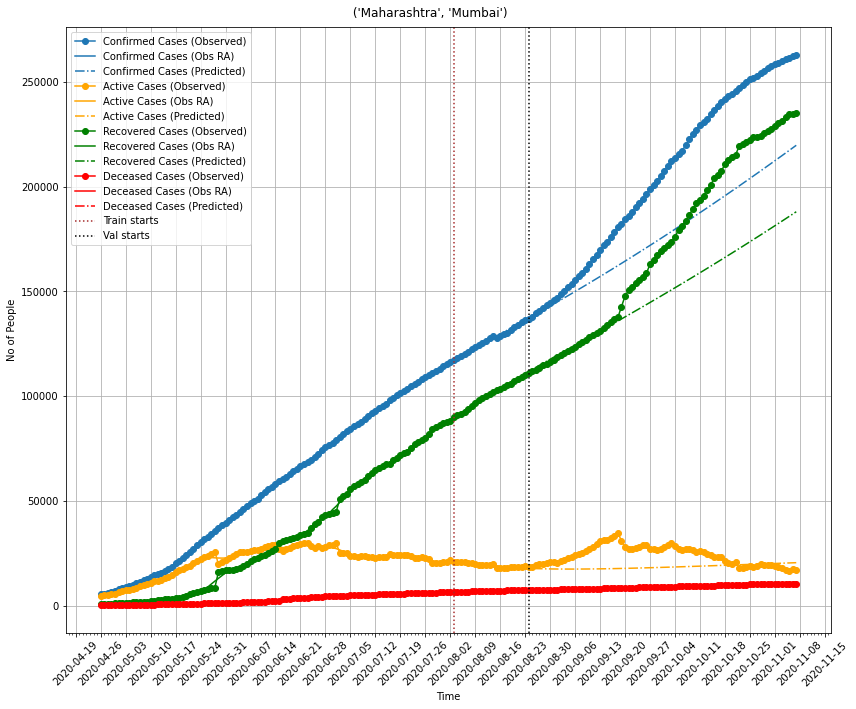

In [8]:
num_rep_trials = 15
for tag, end_date in enumerate(dates):
    predictions_dict[tag] = {}
    for j, config in enumerate(configs):
        predictions_dict[tag][model_names[j]] = {}
        config_params = copy.deepcopy(config['fitting'])
        config_params['split']['end_date'] = end_date.date()
        for k in range(num_rep_trials):
            predictions_dict[tag][model_names[j]][f'm{k}'] = single_fitting_cycle(**config_params)

In [9]:
with open('../../misc/predictions/predictions_dict_jul.pickle', 'wb') as handle:
    pkl.dump(predictions_dict, handle)

In [10]:
with open('../../misc/predictions/predictions_dict_jul.pickle', 'rb') as handle:
    predictions_dict = pkl.load(handle)

In [11]:
trials = ['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9']

In [12]:
loss_type = ['train','val']
compartments = ['total', 'active', 'recovered', 'deceased']

In [13]:
import pandas as pd

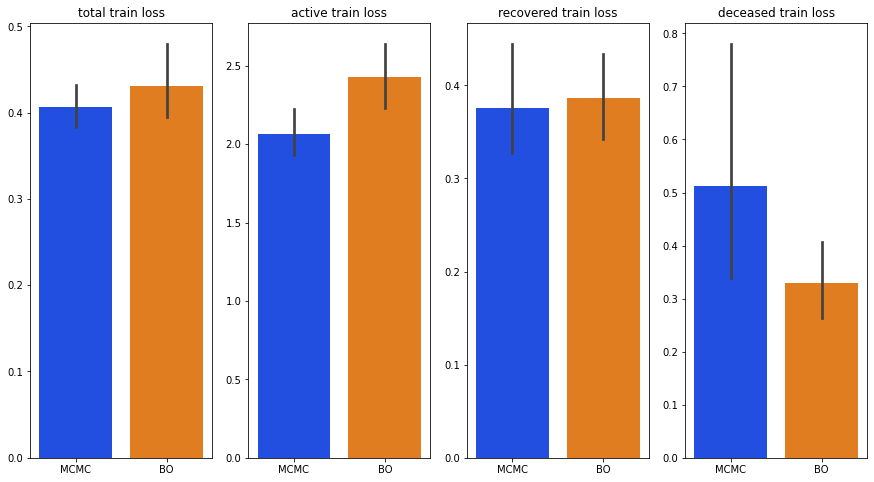

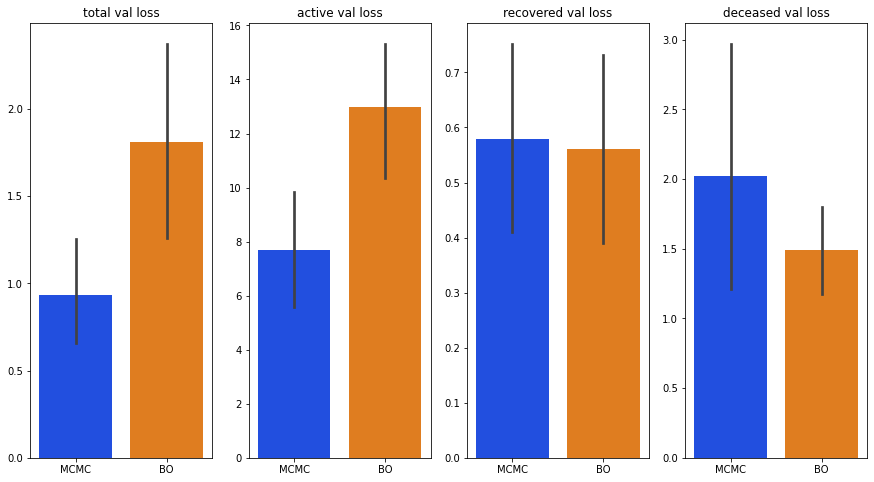

In [14]:
for l in loss_type:
    fig, AX = plt.subplots(nrows=1, ncols=4, sharex=True,figsize=(15, 8))
    for i,c in enumerate(compartments):
        MC_loss =[ predictions_dict[0]['MCMC'][i]['df_loss'][l][c] for i in trials]
        BO_loss =[ predictions_dict[0]['HyperOpt'][i]['df_loss'][l][c] for i in trials]
        data = {"MCMC":MC_loss,"BO":BO_loss}
        df = pd.DataFrame(data,columns = ["MCMC","BO"])
        sns.barplot(data =df ,ax = AX[i],palette = 'bright')
        AX[i].title.set_text(c+" "+l +" loss")

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64
sex     cla

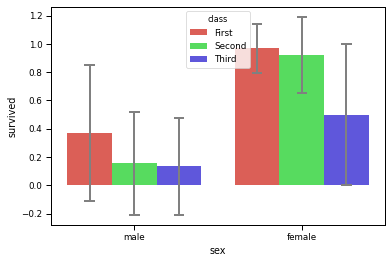

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

# load dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

# create plot
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(titanic.groupby(['sex', 'class']).mean()['survived'])
print(titanic.groupby(['sex', 'class']).std()['survived'])

plt.show()